This script is used to analyze data and produce Suplementary Information of the manuscript
'Plasmid-mediated phenotypic noise leads to transient antibiotic resistance in bacteria'.

MIT License

Copyright (c) 2023 JCRHB/RPM

## Mounting Gdrive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install schemdraw


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.6/172.6 kB 3.1 MB/s eta 0:00:00


In [3]:
import schemdraw
from schemdraw import flow
%matplotlib inline

In [4]:
%config InlineBackend.figure_format = 'svg'

In [5]:
rootDir="/content/drive/MyDrive/SYNC_Projects/"

rootDir=rootDir+"pBGT/GIT/"
pathFigures=rootDir+"figures/SupplementaryInformation/"

Saving figure /content/drive/MyDrive/SYNC_Projects/pBGT/GIT/figures/SupplementaryInformation/SI_Fig-1.svg ...


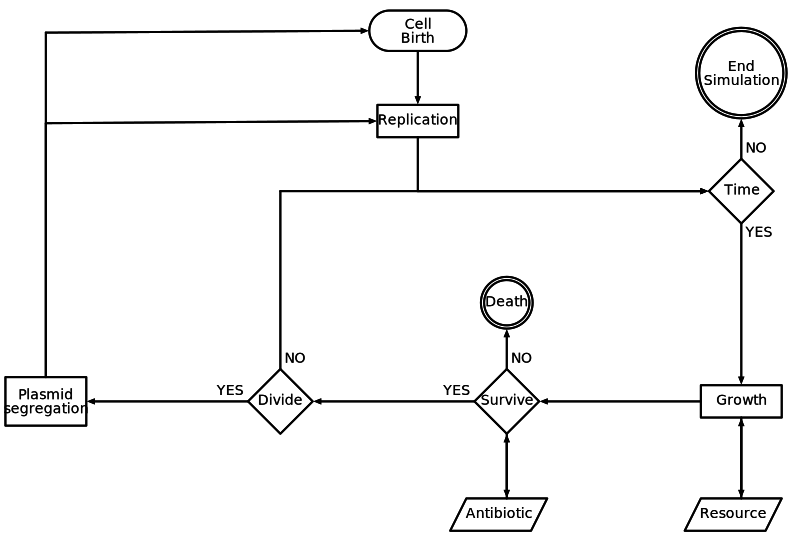

In [6]:
schemdraw.use('svg')
#schemdraw.use('matplotlib')
schemdraw.theme('default')
d=schemdraw.Drawing()
d.config(fontsize=14, unit=5)

d += (birth:=flow.Start().label('Cell\nBirth'))
d += flow.Arrow().down(d.unit/3).at(birth.S)
d += (rep:=flow.Box(w=2.5, h=1).label('Replication'))
d += (xt:=flow.Line().down(d.unit/3).at(rep.S))
d+= flow.Arrow().right(d.unit+4)#.at(rep.S)
d+= (time:=flow.Decision(w=2, h=2, N='NO', S='YES').label('Time'))
d+= flow.Arrow().up(d.unit/4).at(time.N)
d+= flow.StateEnd(r=1.4,dr=.1).label("End\nSimulation")

d+= flow.Arrow().down(d.unit).at(time.S)
d+= (growth:=flow.Box(w=2.5, h=1).label('Growth'))
d+= flow.Arrow().down(d.unit/2).at(growth.S)
d+= (res:=flow.Data(w=2.5, h=1).label('Resource'))
d+= flow.Wire(k=5,arrow="->").at(res.N).to(growth.S)

d+= flow.Arrow().left(d.unit).at(growth.W)
d+= (resist:=flow.Decision(w=2, h=2, N='NO', W='YES').label('Survive'))
d+= flow.Arrow().down(d.unit/2-.5).at(resist.S)
d+= (Ab:=flow.Data(w=2.5, h=1).label('Antibiotic'))
d+= flow.Wire(k=5,arrow="->").at(Ab.N).to(resist.S)

d+= flow.Arrow().up(d.unit/4).at(resist.N)
d+= flow.StateEnd(r=0.8,dr=.1).label("Death")#.fill('red')
d+= flow.Arrow().left(d.unit).at(resist.W)
d+= (divide:=flow.Decision(w=2, h=2, N='NO', W='YES').label('Divide'))
d += flow.Line().up(d.unit+0.5).at(divide.N)
d+= flow.Wire(k=5,arrow="->").to(time.W)

d+= flow.Arrow().left(d.unit).at(divide.W)
d+= (seg:=flow.Box(w=2.5, h=1.5).label('Plasmid\nsegregation'))
d += (x2:=flow.Line().up(d.unit+2.85).at(seg.N))
d+= flow.Wire(arrow="->").to(rep.W)
d += (x2:=flow.Line().up(d.unit+5.65).at(seg.N))
d+= flow.Wire(k=5,arrow="->").to(birth.W)#.at(x2)
d.draw(showframe=False )
figname=pathFigures+"SI_Fig-1.svg"
print("Saving figure %s ..."%figname)
d.save(figname,transparent=False)
d